# **US Air Pollution 2000-2016 Analysis – Visualisations**

# Exploratory Data Analysis (EDA) – US Air Pollution Data

## Objectives

* Load the cleaned US air pollution dataset.
* Explore the structure and summary statistics.
* Visualise pollution patterns.
* Enable state-level pollution to be compared.

## Hypotheses

* As environmental awareness has increased, pollution levels have decreased.
* Certain states will have made better progress than others, allowing qualitative research to be conducted to leverage best practise
* City pollution is higher than 'not in a city' on average, meaning mitigating measures should initially be urban.
* Pollution is higher at 'commute' times, meaning extra measures on commuting should be considered.

## Inputs

* cleaned_pollution_data.csv
* location_data.csv 
* Python libraries (pandas, seaborn, matplotlib, plotly)

## Outputs

* Visualisations and initial insights.


---
# Section 1 – Load the Dataset and Basic Inspection

In this section, we will:
* Load the cleaned pollution dataset.
* Preview the first rows.
* Inspect data types and missing values.
* Review summary statistics.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import ydata_profiling
from pathlib import Path


# Load the cleaned US air pollution dataset
df=pd.read_csv('cleaned_pollution_data.csv')
df.head()

,Unnamed: 0,State,Date Local,NO2 Mean (ppb),NO2 1st Max Value (ppb),NO2 1st Max Hour,NO2 AQI,O3 Mean (ppm),O3 1st Max Value (ppm),O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,O3_AQI_imp,SO2_AQI_imp,CO_AQI_imp,NO2_AQI_imp,Year,Quarter,DayOfWeek,County_State
0,0,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,...,21,NaN,9.26,12.86,47.73,17.96,2000,1,Saturday,"Maricopa, Arizona"
1,1,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,...,23,25.0,9.26,12.86,25.00,17.96,2000,1,Saturday,"Maricopa, Arizona"
2,2,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,...,21,NaN,9.26,9.43,47.73,17.96,2000,1,Saturday,"Maricopa, Arizona"
3,3,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,...,23,25.0,9.26,9.43,25.00,17.96,2000,1,Saturday,"Maricopa, Arizona"
4,4,Arizona,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,...,23,NaN,9.26,4.29,18.18,21.66,2000,1,Sunday,"Maricopa, Arizona"


In [4]:
# undertake a basic profile of the cleaned data
df.describe(include='all')

,Unnamed: 0,State,Date Local,NO2 Mean (ppb),NO2 1st Max Value (ppb),NO2 1st Max Hour,NO2 AQI,O3 Mean (ppm),O3 1st Max Value (ppm),O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,O3_AQI_imp,SO2_AQI_imp,CO_AQI_imp,NO2_AQI_imp,Year,Quarter,DayOfWeek,County_State
count,1.746661e+06,1746661,1746661,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,...,1.746661e+06,873338.000000,1.746661e+06,1.737973e+06,1.746451e+06,1.745285e+06,1.746661e+06,1.746661e+06,1746661,1746661
unique,NaN,47,5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,139
top,NaN,California,2002-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,"Los Angeles, California"
freq,NaN,576142,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250574,93381
mean,5.471414e+04,NaN,NaN,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,...,7.875026e+00,5.996595,9.417714e+00,6.381437e+00,7.043313e+00,1.209393e+01,2.008286e+03,2.512522e+00,NaN,NaN
std,3.372908e+04,NaN,NaN,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,...,7.978844e+00,5.851836,3.706877e+00,1.029570e+01,7.290283e+00,8.953375e+00,4.653364e+00,1.073622e+00,NaN,NaN
min,0.000000e+00,NaN,NaN,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+03,1.000000e+00,NaN,NaN
25%,2.575300e+04,NaN,NaN,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,...,0.000000e+00,2.000000,8.330000e+00,1.290000e+00,3.330000e+00,5.440000e+00,2.004000e+03,2.000000e+00,NaN,NaN
50%,5.304500e+04,NaN,NaN,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,...,6.000000e+00,5.000000,9.260000e+00,2.860000e+00,4.550000e+00,1.013000e+01,2.009000e+03,3.000000e+00,NaN,NaN
75%,8.033600e+04,NaN,NaN,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,...,1.300000e+01,8.000000,1.019000e+01,7.140000e+00,9.090000e+00,1.671000e+01,2.012000e+03,3.000000e+00,NaN,NaN


---

## Hypothesis 1 - pollution is decreasing over time

In this section we will:

* Aggregate pollutant means by month-year.
* Visualise long-term trends for NO₂, O₃, SO₂, and CO.
* Comment on changes over the 2000–2016 period.

Before we graph, due to the size of the dataset, we'll aggregate data by quarter, in order to enable seaborn graphing to plot effectively/avoid timeouts.

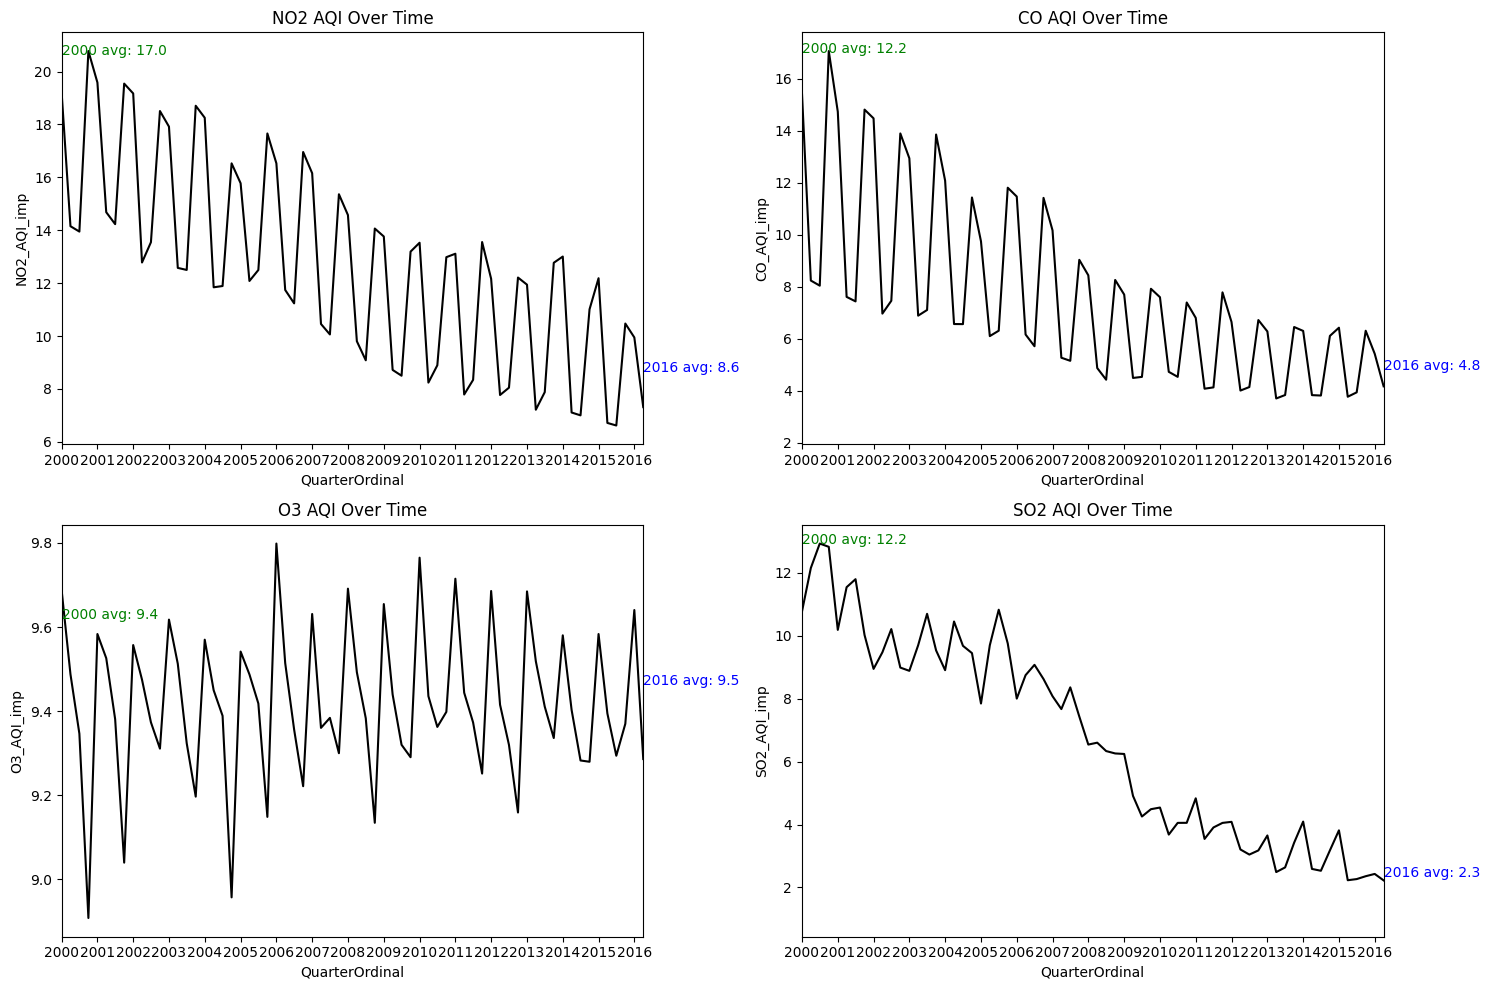

In [5]:
# Step 1: Aggregate AQI values at quarter level
quarterly_df = (
    df.groupby(['Year', 'Quarter'])
      [['NO2_AQI_imp', 'CO_AQI_imp', 'O3_AQI_imp', 'SO2_AQI_imp']]
      .mean()
      .reset_index()
)

# Step 2: Create datetime column for quarter start
quarterly_df['QuarterStart'] = pd.PeriodIndex.from_fields(
    year=quarterly_df['Year'],
    quarter=quarterly_df['Quarter'],
    freq='Q'
).to_timestamp()

# Step 3: Create ordinal version for regression
quarterly_df['QuarterOrdinal'] = quarterly_df['QuarterStart'].map(lambda x: x.toordinal())

# Step 4: Compute start and end year averages
start_year = quarterly_df['Year'].min()
end_year = quarterly_df['Year'].max()

start_avg = quarterly_df[quarterly_df['Year'] == start_year].mean(numeric_only=True)
end_avg = quarterly_df[quarterly_df['Year'] == end_year].mean(numeric_only=True)

# Step 5: Plot with trend lines and annotations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
pollutants = ['NO2_AQI_imp', 'CO_AQI_imp', 'O3_AQI_imp', 'SO2_AQI_imp']
titles = ['NO2 AQI Over Time', 'CO AQI Over Time', 'O3 AQI Over Time', 'SO2 AQI Over Time']

for ax, pollutant, title in zip(axs.flat, pollutants, titles):
    # Regression line using ordinal x-axis
    sns.regplot(
        data=quarterly_df,
        x='QuarterOrdinal',
        y=pollutant,
        ax=ax,
        scatter=False,
        line_kws={'color': 'red'}
    )

    # Actual AQI line using datetime x-axis
    ax.plot(quarterly_df['QuarterStart'], quarterly_df[pollutant], label='Quarterly AQI', color='black')

    # Format x-axis with year ticks
    ax.set_xlim([quarterly_df['QuarterStart'].min(), quarterly_df['QuarterStart'].max()])
    ax.xaxis.set_major_locator(mpl.dates.YearLocator())
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

    ax.set_title(title)

    # Get y-axis limits for positioning
    y_top = ax.get_ylim()[1]

    # Annotate start-year value at top of plot
    ax.text(quarterly_df['QuarterStart'].min(), y_top * 0.98,
            f'{start_year} avg: {start_avg[pollutant]:.1f}',
            color='green', ha='left', va='top')

    # Annotate end-year value near actual line
    ax.text(quarterly_df['QuarterStart'].max(), end_avg[pollutant],
            f'{end_year} avg: {end_avg[pollutant]:.1f}', color='blue')

plt.tight_layout()
plt.show()

From the quarterly trend chart:

* **NO₂, SO₂, and CO show a clear downward trend** over the period.
  * Comparing **2000 to 2016**:
    * **NO₂ AQI** annual mean drops by roughly **50%**.
    * **CO AQI** annual mean drops by about **60%**.
    * **SO₂ AQI** annual mean drops by just over **80%**.
  * This reflects cleaner combustion technologies, fuel regulations, and tighter air quality standards, leading to a decrease in pollution levels.
* **O₃ (ozone)** behaves differently:
  * Its long-term average is relatively stable and even shows a small **2% increase** from 2000 to 2016.
  * Ozone chemistry is complex and influenced by other external factors, which explains why it doesn’t simply mirror NO₂ and CO declines. More data on meteorological conditions and solar radiation would be needed to assess Ozone patterns.

  On the basis of this data, Hypothesis 1 is (mostly) proven - we have successfully reduced direct pollution over the timeframe. Secondary pollutioin, ozone, has not and requires a separate analysis to determine the causation.

## Hypothesis 2 - certain states will improved pollution levels more than others.

Next, we explore geographic differences:

* Look at changes in AQI at state level
* Identify the top 10 states with the highest AQI levels.
* Visualise these relative improvements.

However, not all states have data for the full range of 2000 - 2016. Therefore we'll chart states who've recorded data since 2010 or before AND have data to at least 2015; anything older than that would be pointless to determining where new measures might be needed.

In [29]:
# Step 1: Build filtered state list with correct final year logic

valid_states = []

for _, row in coverage_summary.iterrows():
    # Exclude states with < 5 years of coverage
    if (row['LastYear'] - row['FirstYear'] + 1) < 5:
        continue
    
    # First year must be before 2010
    if row['FirstYear'] >= 2010:
        continue
    
    # Final year: prefer 2016 if available, else 2015
    final_year = 2016 if row['LastYear'] >= 2016 else 2015
    
    valid_states.append({
        'State': row['State'],
        'FirstYear': row['FirstYear'],
        'FinalYear': final_year
    })

valid_states_df = pd.DataFrame(valid_states)
print(valid_states_df)

                   State  FirstYear  FinalYear
0                Arizona       2000       2016
1             California       2000       2016
2               Colorado       2000       2016
3   District Of Columbia       2000       2016
4                Indiana       2000       2016
5               Illinois       2000       2016
6                Florida       2000       2016
7                 Kansas       2000       2016
8               Missouri       2000       2016
9         North Carolina       2000       2016
10              New York       2000       2016
11            New Jersey       2000       2015
12              Michigan       2000       2015
13             Louisiana       2000       2016
14              Kentucky       2000       2015
15              Oklahoma       2000       2016
16                 Texas       2000       2016
17              Virginia       2000       2016
18          Pennsylvania       2000       2016
19                Nevada       2001       2016
20         Ma

In [31]:
improvements = []

for _, row in valid_states_df.iterrows():
    st = row['State']
    y0 = row['FirstYear']
    y1 = row['FinalYear']
    
    start_vals = (
        df[(df['State'] == st) & (df['Year'] == y0)]
        .groupby(['State','County_State'])
        [['NO2_AQI_imp','SO2_AQI_imp','CO_AQI_imp']]
        .mean()
        .reset_index()
    )
    
    end_vals = (
        df[(df['State'] == st) & (df['Year'] == y1)]
        .groupby(['State','County_State'])
        [['NO2_AQI_imp','SO2_AQI_imp','CO_AQI_imp']]
        .mean()
        .reset_index()
    )
    
    merged = pd.merge(start_vals, end_vals, on=['State','County_State'], suffixes=('_start','_end'))
    
    if merged.empty:
        # Skip states with no overlapping County_State entries
        continue
    
    merged['NO2_change'] = merged['NO2_AQI_imp_start'] - merged['NO2_AQI_imp_end']
    merged['SO2_change'] = merged['SO2_AQI_imp_start'] - merged['SO2_AQI_imp_end']
    merged['CO_change']  = merged['CO_AQI_imp_start']  - merged['CO_AQI_imp_end']
    merged['Total_change'] = merged[['NO2_change','SO2_change','CO_change']].sum(axis=1)
    
    # Best county per state (guard against all-NA)
    if merged['Total_change'].notna().any():
        best_county = merged.loc[merged['Total_change'].idxmax()]
        best_county_name = best_county['County_State']
        best_county_change = best_county['Total_change']
    else:
        best_county_name = None
        best_county_change = None
    
    improvements.append({
        'State': st,
        'FirstYear': y0,
        'FinalYear': y1,
        'NO2_change': merged['NO2_change'].mean(),
        'SO2_change': merged['SO2_change'].mean(),
        'CO_change': merged['CO_change'].mean(),
        'Total_change': merged['Total_change'].mean(),
        'BestCounty': best_county_name,
        'BestCounty_change': best_county_change
    })

state_summary = pd.DataFrame(improvements)

In [33]:
#map states to their 2 letter codes for plotting

# Dictionary of full state names to USPS abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District Of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply mapping to your summary DataFrame
state_summary['State'] = state_summary['State'].map(us_state_abbrev)

# Drop any rows where mapping failed (e.g. non‑US entries like 'Country Of Mexico')
state_summary = state_summary.dropna(subset=['State'])

In [34]:
# create choropleth

import plotly.express as px

fig = px.choropleth(
    state_summary,
    locations='State',
    locationmode='USA-states',
    color='Total_change',
    color_continuous_scale='Blues',
    scope='usa',
    hover_data={
        'FirstYear': True,
        'FinalYear': True,
        'BestCounty': True,
        'BestCounty_change': ':.1f',
        'NO2_change': ':.1f',
        'SO2_change': ':.1f',
        'CO_change': ':.1f'
    },
    labels={'Total_change':'AQI Improvement'}
)

fig.update_layout(
    title_text='State-Level AQI Improvements (baseline <2010, final 2016 if available else 2015, excluding <5yr states)',
    geo=dict(showcoastlines=True, showland=True)
)

fig.show()

We can see from the map that Illinois is the most improved state, with Cook County (shout out to the Blues Brothers) being the best county in Illinois.

---
# Section 7 – Correlation Heatmap (Pollutants & AQI)

In this final section, we:

* Build a correlation matrix for:
  * Pollutant means (`NO2 Mean`, `O3 Mean`, `SO2 Mean`, `CO Mean`)
  * Their corresponding AQI fields (`NO2 AQI`, `O3 AQI`, `SO2 AQI`, `CO AQI`)
* Visualise the correlations using a Seaborn heatmap.


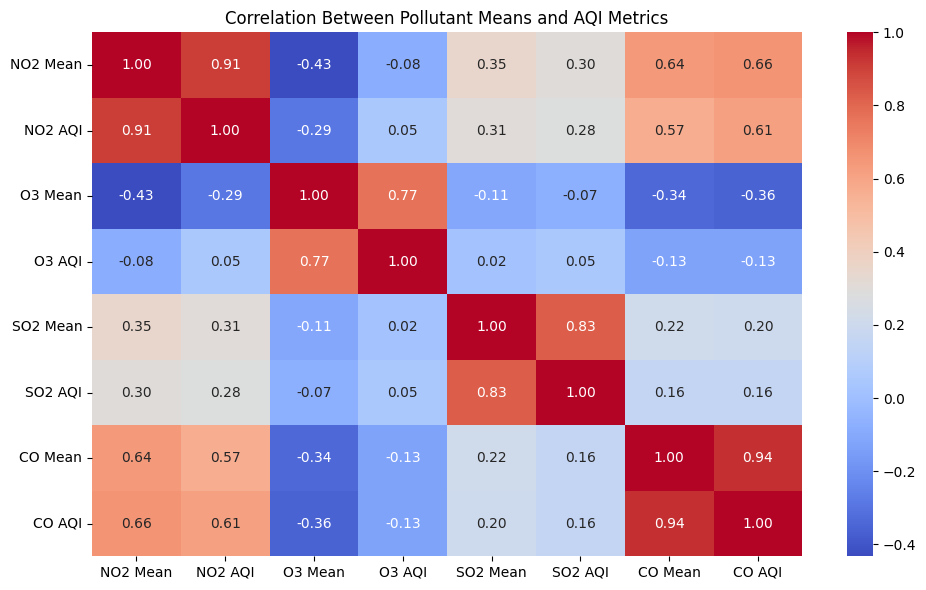

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
NO2 Mean,1.000000,0.905418,-0.432650,-0.082361,0.348186,0.295347,0.641828,0.661031
NO2 AQI,0.905418,1.000000,-0.291720,0.049027,0.305201,0.281377,0.566264,0.614445
O3 Mean,-0.432650,-0.291720,1.000000,0.768771,-0.110401,-0.070859,-0.339426,-0.355314
O3 AQI,-0.082361,0.049027,0.768771,1.000000,0.015523,0.051973,-0.129736,-0.130092
SO2 Mean,0.348186,0.305201,-0.110401,0.015523,1.000000,0.828354,0.215216,0.204040
SO2 AQI,0.295347,0.281377,-0.070859,0.051973,0.828354,1.000000,0.156616,0.157649
CO Mean,0.641828,0.566264,-0.339426,-0.129736,0.215216,0.156616,1.000000,0.936889
CO AQI,0.661031,0.614445,-0.355314,-0.130092,0.204040,0.157649,0.936889,1.000000


In [16]:
pollutant_cols = [
    "NO2 Mean", "NO2 AQI",
    "O3 Mean", "O3 AQI",
    "SO2 Mean", "SO2 AQI",
    "CO Mean", "CO AQI"
]

corr = df[pollutant_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutant Means and AQI Metrics")
plt.tight_layout()
plt.show()

corr


The correlation matrix shows:

* **Strong positive correlations between each pollutant and its own AQI:**
  * `NO2 Mean` vs `NO2 AQI` ≈ **0.91**
  * `O3 Mean` vs `O3 AQI` ≈ **0.77**
  * `SO2 Mean` vs `SO2 AQI` ≈ **0.83**
  * `CO Mean` vs `CO AQI` ≈ **0.94**
  * This confirms that the AQI fields behave as expected and can be trusted as summarised air quality indicators (where present).
* **Notable cross-pollutant relationships:**
  * `NO2 Mean` and `CO Mean` have a **moderately strong positive correlation** (~**0.64**), reflecting shared sources such as vehicle emissions.
  * `NO2 Mean` and `O3 Mean` are **moderately negatively correlated** (~**-0.43**), aligning with what was highlted in the earlier scatter plot.
  * SO₂ is more weakly correlated with other pollutants, suggesting different sources or regional behaviour.

This heatmap helps identify which pollutants drive overall air quality and where redundancies or strong dependencies exist.


---
# Conclusions

Based on this exploratory data analysis of US air pollution (2000–2016):

### 1. Long-Term Trends

* **NO₂, SO₂, and CO have declined substantially over time**:
  * NO₂ mean levels fell by roughly **46%** (2000 → 2015).
  * SO₂ mean levels fell by nearly **80%** over the same period.
  * CO mean levels decreased by about **50%**.
* These improvements strongly suggest:
  * the impact of stricter emission standards,
  * improved fuel quality,
  * and wider adoption of cleaner technologies.
* **O₃ (ozone)** remains relatively stable and slightly higher (~**+9%**) over the same period, reflecting the complexity of ozone formation.


### 2. Geographic Differences

* Some states (e.g., **Colorado**, **Arizona**, **Massachusetts**, **New Jersey**, **New York**) exhibit **higher average NO₂ levels** (around **18–20 ppb**).
* Others, including **Tennessee**, **South Carolina**, **Hawaii**, **Wyoming**, and **North Dakota**, show **much lower levels** (below **5 ppb**).
* This demonstrates:
  * strong urban vs rural differences,
  * the effect of industrialisation and traffic density,
  * and possible regional policy differences.

### 4. Seasonal Patterns

* **NO₂ is clearly seasonal**:
  * Highest in **winter** (January, November, December).
  * Lowest in **summer** (June, July).
* This aligns with expectations:
  * Wintertime atmospheric conditions and heating-related emissions elevate NO₂.
  * Summer mixing and dispersion reduce NO₂ but may contribute to higher ozone episodes.

### 5. Relationships Between Pollutants

* NO₂ and CO are **moderately strongly correlated** (~**0.64**), supporting the idea of shared combustion-related sources such as traffic.
* NO₂ and O₃ have a **moderate negative correlation** (~**-0.43**), consistent with known urban ozone chemistry.
* Each pollutant’s mean is strongly correlated with its AQI, confirming the internal consistency between raw pollution measures and air quality indices.


Overall, this paints a clear story:

* Air quality in terms of NO₂, SO₂, and CO has **improved significantly** over the 16-year period.
* There are **distinct geographic hotspots** and clear **seasonal cycles**, especially for NO₂.

These findings can be further explored on the PowerBi dashboard, available at [(https://app.powerbi.com/links/ETRxXjNKcK?ctid=c233c072-135b-431d-af59-35e05babf941&pbi_source=linkShare&bookmarkGuid=d1378e0c-8c06-4e0c-be0d-c1043e83cdc8)]



